<a href="https://colab.research.google.com/github/atosiroy/CV_Tirana/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import numpy as np

<ipython-input-4-95a174c8d4d6>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(I)
<ipython-input-4-95a174c8d4d6>:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


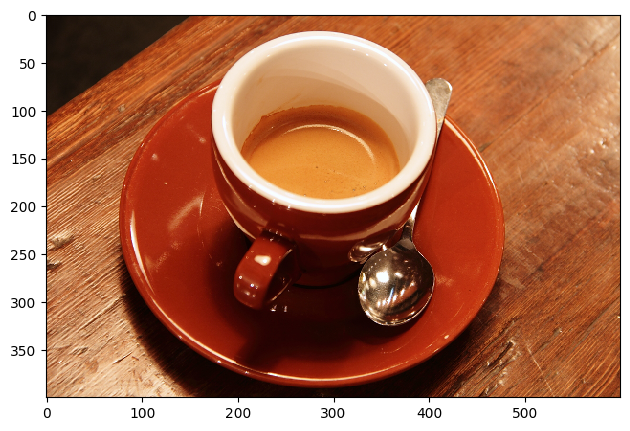

In [4]:
import skimage as sk
I = sk.data.coffee()
sk.io.imshow(I)
sk.io.show()

In [5]:
I.shape

(400, 600, 3)

In [6]:
I[0,0]

array([21, 13,  8], dtype=uint8)

In [7]:
IG = sk.color.rgb2gray(I)

<ipython-input-8-9d952ef19676>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(IG)
<ipython-input-8-9d952ef19676>:2: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


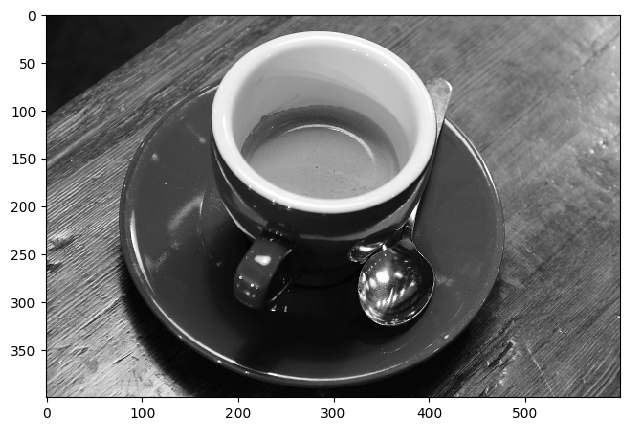

In [8]:
sk.io.imshow(IG)
sk.io.show()

In [9]:
IG.shape

(400, 600)

<ipython-input-10-faf7378bddc1>:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


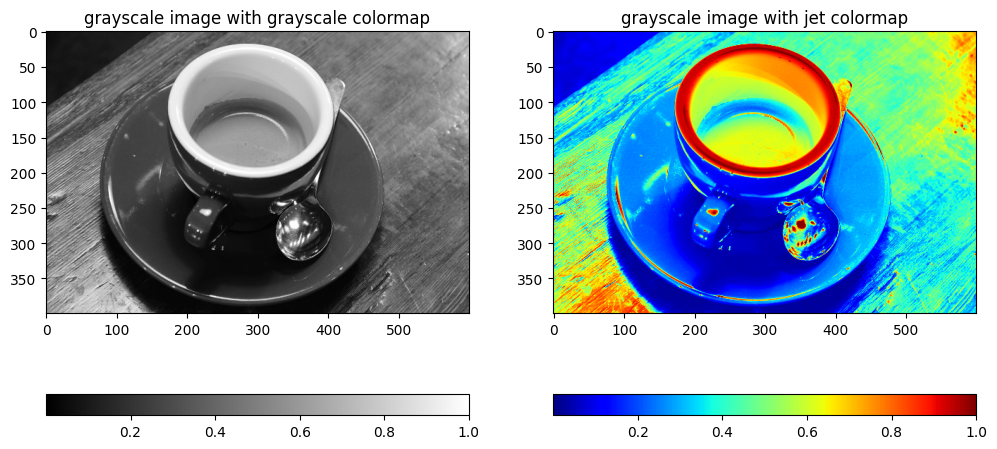

In [10]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2,figsize=(12,7))
ax = axes.ravel() # convert axes to a 1d array
im1 = ax[0].imshow(IG,cmap=plt.cm.gray) # visualize image using imshow function using a grayscale colormap
ax[0].set_title('grayscale image with grayscale colormap') # set figure title
fig.colorbar(im1,ax=ax[0],orientation='horizontal') # visualize colorbar
im2 = ax[1].imshow(IG,cmap=plt.cm.jet) # visualize image using imshow function using a grayscale colormap
ax[1].set_title('grayscale image with jet colormap') # set figure title
fig.colorbar(im2,ax=ax[1],orientation='horizontal') # visualize colorbar
sk.io.show()

In [11]:
from skimage.util import img_as_ubyte
IGB = img_as_ubyte(IG)
np.max(IGB)

np.uint8(255)

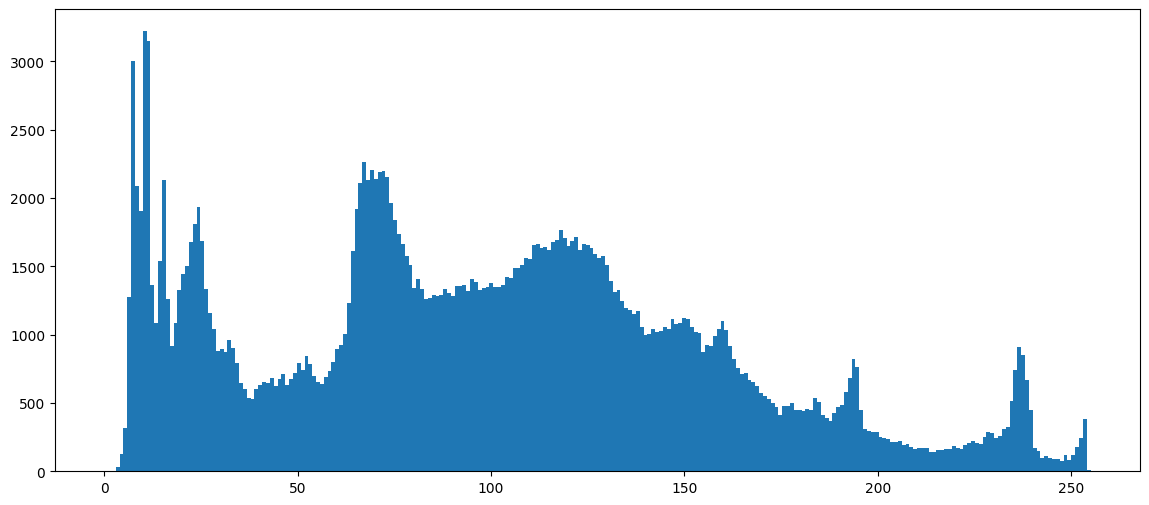

In [12]:
import matplotlib.pyplot as plt
import numpy as np
v = IGB.reshape(IGB.shape[0]*IGB.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

In [13]:
IGB.shape[0]*IGB.shape[1]

240000

In [14]:
v[v==0].shape[0]

1

In [15]:
p0 = v[v==0].shape[0]/(IGB.shape[0]*IGB.shape[1])
print(p0)

4.166666666666667e-06


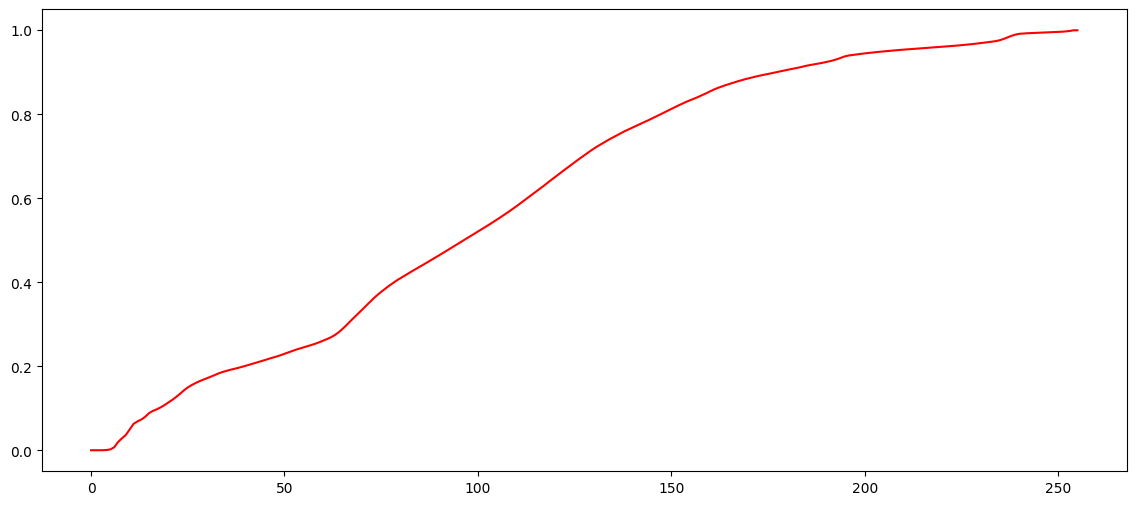

In [16]:
from skimage import exposure

img_cdf, bins = exposure.cumulative_distribution(IGB, 255)
fig = plt.figure(figsize=(14, 6))
plt.plot(bins,img_cdf,'r')
plt.show()

In [17]:
v = IGB.reshape(IGB.shape[0]*IGB.shape[1],1)
np.median(v)

np.float64(97.0)

**task 2**


In [18]:
from skimage import data
from skimage import img_as_ubyte

gaussian noise to the image


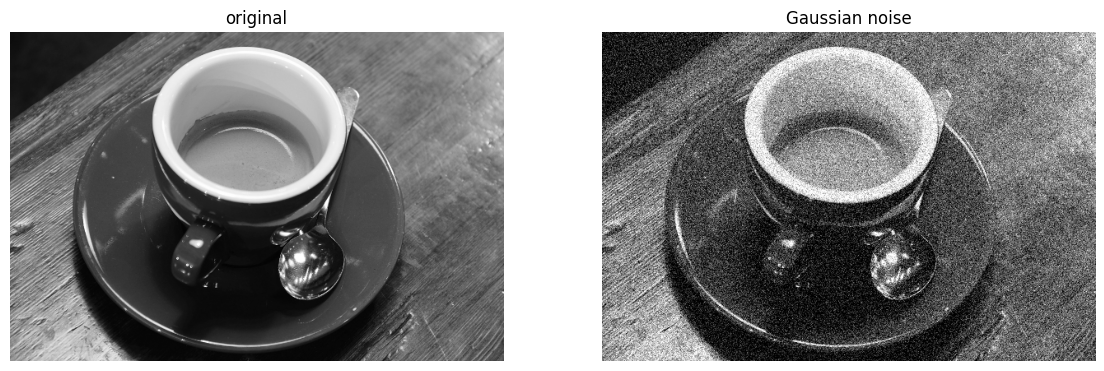

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte

from skimage import data, img_as_float
from skimage.util import random_noise

def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')


img = img_as_float(IGB)
sigma = 0.15
noisy_image_normal = random_noise(img, var=sigma**2)

plot_comparison(img,noisy_image_normal,'Gaussian noise')

'local var' Gaussian-distributed additive noise with specific variance at each point

In [26]:
local_vars = np.full(img.shape, sigma**2)  # uniform noise
local_vars[100:200, :] = 0.5      # high variance in center block
noisy_image_local = random_noise(img, mode='localvar', local_vars=local_vars)

# Show all images
plot_comparison(
    [img, noisy_image_normal, noisy_image_local],
    ['Original Image', 'Gaussian Noise (global)', 'Gaussian Noise (localvar)']
)

TypeError: plot_comparison() missing 1 required positional argument: 'filter_name'

‘poisson’ Poisson-distributed noise generated from the data

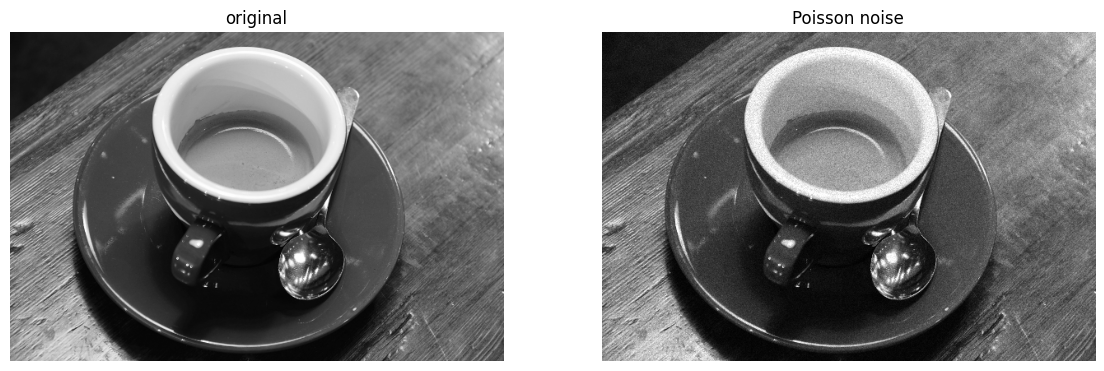

In [28]:
img = img_as_float(IGB)
noisy_image_poisson = random_noise(img, mode='poisson')
plot_comparison(img,noisy_image_poisson,'Poisson noise')

‘salt’ Replaces random pixels with 1.

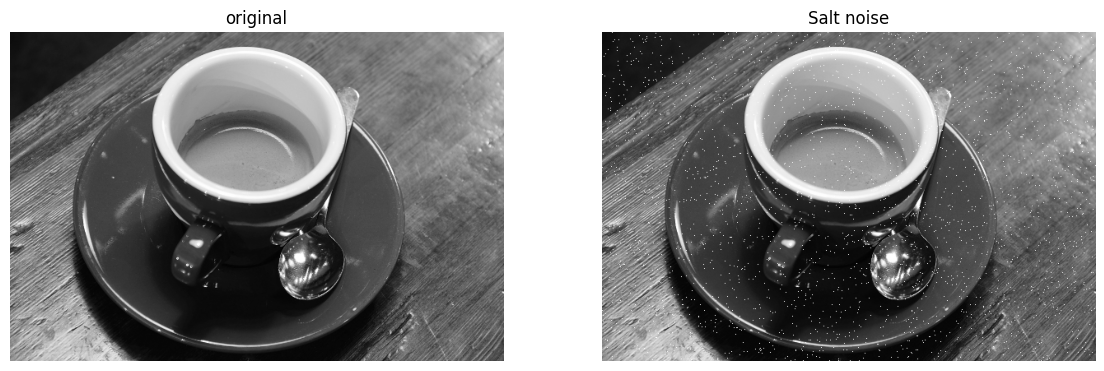

In [30]:
noise = np.random.random(img.shape)
noisy_image = img_as_ubyte(IGB)
noisy_image[noise > 0.99] = 255
plot_comparison(img,noisy_image,'Salt noise')

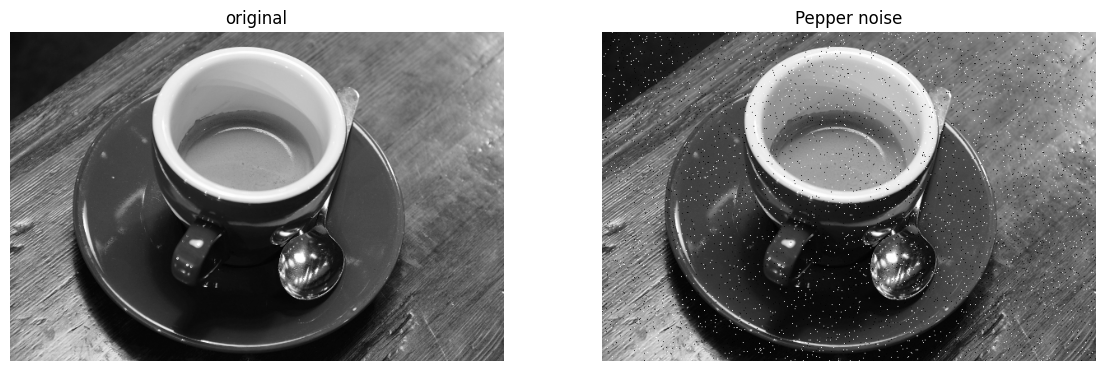

In [31]:
noisy_image[noise < 0.01] = 0
plot_comparison(img,noisy_image,'Pepper noise')

s&p’ Replaces random pixels with either 1 or low_val, where low_val is 0 for unsigned images or -1 for signed images.

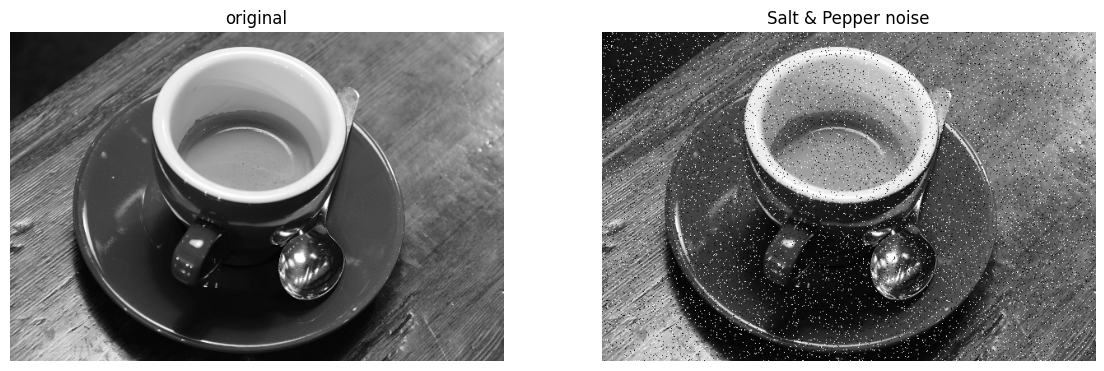

In [35]:
noise = np.random.random(img.shape) # uniform random numbers between 0 and 1
noisy_image = img_as_ubyte(IGB)
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0

plot_comparison(img,noisy_image,'Salt & Pepper noise')

‘speckle’ Multiplicative noise using out = image + n*image, where n is Gaussian noise with specified mean & variance.


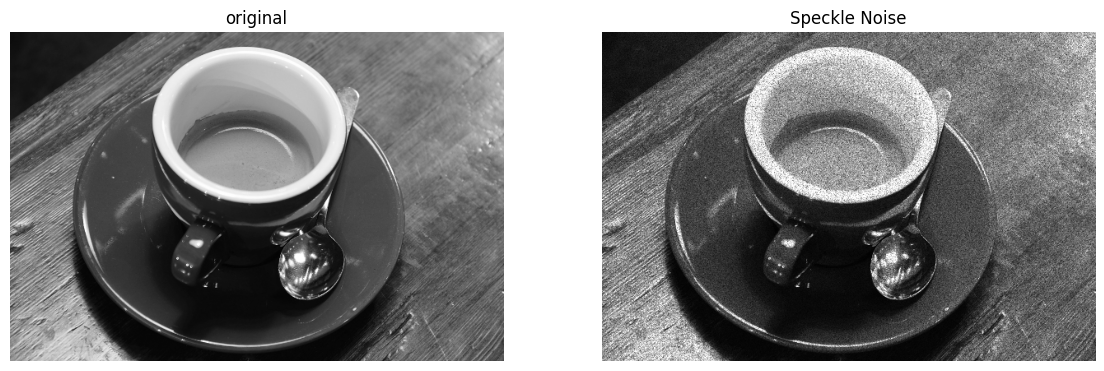

In [37]:
noisy_speckle = random_noise(img, mode='speckle', var=0.04)
plot_comparison(img, noisy_speckle, 'Speckle Noise')